In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_re = pd.read_excel("../rawdata/rawREValue.xls", header=10)

raw_re = raw_re.loc[raw_re['WILLRESIND'] > 0]
raw_re.reset_index(inplace=True)
real_estate = raw_re[["observation_date", "WILLRESIND"]]
np.save('real_estate.npy', real_estate.to_numpy())


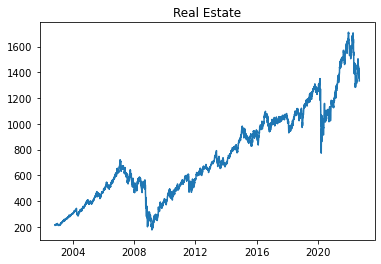

In [8]:
fig, axis = plt.subplots(1)
POINTS = 5000
x, y = real_estate.iloc[-POINTS:,0], real_estate.iloc[-POINTS:, 1] 
axis.plot(x, y)
axis.set_title("Real Estate")
plt.show()

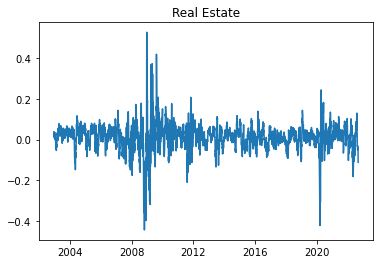

In [9]:
DAYS_FOR_MTH = 20
fig, axis = plt.subplots(1)
x, y = real_estate.iloc[-POINTS:,0], real_estate.iloc[-POINTS:, 1].pct_change(DAYS_FOR_MTH)
axis.plot(x, y)
axis.set_title("Real Estate")
plt.show()

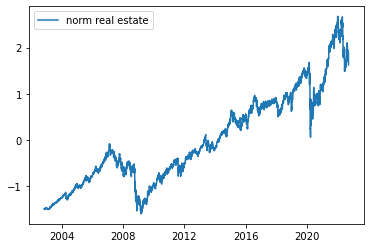

In [10]:
def normalise_df(df):
    return (df-df.mean())/df.std()

sliced_re = real_estate.iloc[-POINTS:, 1]
dates = real_estate.iloc[-POINTS:, 0]
norm_re = normalise_df(sliced_re)

plt.plot(dates, norm_re, label= "norm real estate")
plt.legend()